## Model Training
### Gradient Boosting 

Model: xgboost
Preprocess: default
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 88.47585153579712 seconds

Model: xgboost
Preprocess: adasyn
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 55.00427460670471 seconds

Model: xgboost
Preprocess: cs
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 59.32397413253784 seconds

Model: xgboost
Preprocess: nearmiss
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 56.30854344367981 seconds

Model: xgboost
Preprocess: ros
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 53.17967414855957 seconds

Model: xgboost
Preprocess: smote
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 53.34410333633423 seconds

Model: xgboost
Preprocess: fullfeature
Optimize: on


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Training Time: 55.28486394882202 seconds



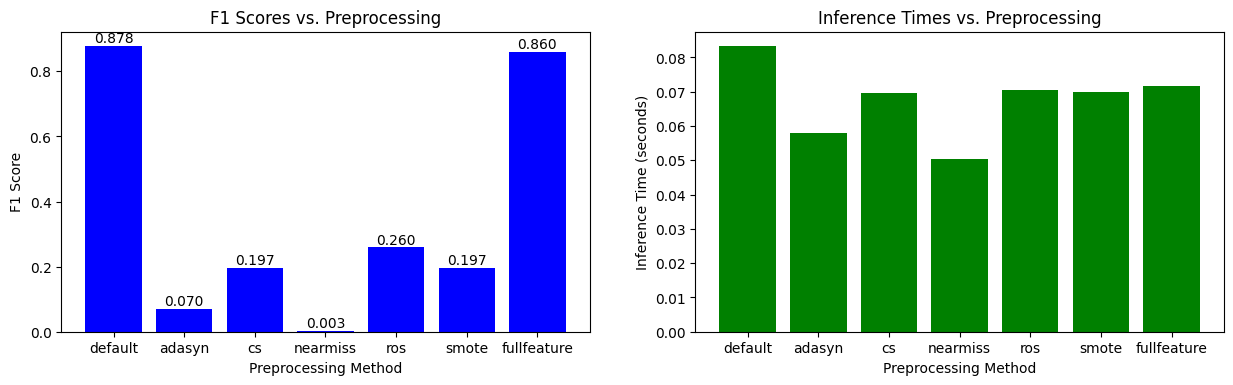

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time
import numpy as np


preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote','fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []

def train_model_xgboost(opt='off', random_state=42, preprocess='default', k_fold=5,
                        cross_val='off', n_estimators=100, max_depth=3, learning_rate=0.1):
    # Load the dataset based on the preprocess parameter
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()
        

    # Initialize XGBoost model
    model = XGBClassifier(random_state=random_state, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    print(f'Model: xgboost\nPreprocess: {preprocess}\nOptimize: {opt}')

    # Apply optimization if opt is 'on'
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # Evaluate using cross-validation or fit the model
    if cross_val == 'on':
        start_time = time.time()    
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()
        model.fit(X, y)
        end_time = time.time()

    # Print training time
    print(f'Training Time: {end_time - start_time} seconds\n')

    # Return the trained model
    return model

# XGBoost
for pre in preprocess:
    model = train_model_xgboost(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1_score:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

### ANN

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV



preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote','fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []

def train_model_neural_network(opt='off', random_state=42, preprocess='default', k_fold=5,
                               cross_val='off', learning_rate=0.001, hidden_layer_sizes=(100,)):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # 读取数据集
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()
        

    # 初始化神经网络模型
    model = MLPClassifier(random_state=random_state, learning_rate_init=learning_rate, hidden_layer_sizes=hidden_layer_sizes)
    print(f'Model: neural_network\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # 使用K折交叉验证评估模型性能
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X, y)
        end_time = time.time()
    
    # 打印训练时间
    print(f'Training Time: {end_time - start_time} seconds\n')

    # 返回训练好的模型
    return model

# neural_network
for pre in preprocess:
    model = train_model_neural_network(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1_score:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: neural_network
Preprocess: default
Optimize: on
Training Time: 329.18102741241455 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: neural_network
Preprocess: adasyn
Optimize: on


In [ ]:
//结果已经跑过了，截图在报告里面，因为汇总移动文件位置，前面几个就没有重新生成结果了，后面的几个有输出结果。

### Logistic ReLgression

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time
import numpy as np
from sklearn.linear_model import LogisticRegression




preprocess = ['fullfeature','default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []

def train_model_logistic_regression(opt='off', random_state=42, preprocess='default', k_fold=5,
                                    cross_val='on', C=1.0):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # Read the dataset
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()

    # Initialize Logistic Regression model
    model = LogisticRegression(random_state=random_state, C=C)
    print(f'Model: logistic_regression\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # Use K-fold cross-validation to evaluate model performance
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X, y)
        end_time = time.time()
    
    # Print training time
    print(f'Training Time: {end_time - start_time} seconds\n')

    # Return the trained model
    return model

for pre in preprocess:
    model = train_model_logistic_regression(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1_score:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

In [ ]:
//结果已经跑过了，截图在报告里面，因为汇总移动文件位置，前面几个就没有重新生成结果了，后面的几个有输出结果。

In [ ]:
### Decision Tree

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time

def train_model_decision_tree(opt='off', random_state=42, preprocess='default', k_fold=5,
                             cross_val='off', max_depth=5, min_samples_split=15):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # 读取数据集
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv')
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv')

    # 初始化决策树模型
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, min_samples_split=min_samples_split)
    print(f'Model: decision_tree\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # 使用K折交叉验证评估模型性能
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X,y)
        end_time = time.time()
    
    # 打印训练时间
    print(f'Training Time: {end_time - start_time} seconds\n')

    # 返回训练好的模型
    return model

### Random Forest

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time

def train_model_random_forest(opt='off', random_state=42, preprocess='default', k_fold=5,
                               cross_val='off', n_estimators=100, max_depth=None):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # 读取数据集
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()

    # 初始化随机森林模型
    model = RandomForestClassifier(random_state=random_state, n_estimators=n_estimators, max_depth=max_depth)
    print(f'Model: random_forest\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # 使用K折交叉验证评估模型性能
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X, y)
        end_time = time.time()
    
    # 打印训练时间
    print(f'Training Time: {end_time - start_time} seconds\n')

    # 返回训练好的模型
    return model

### SVM

In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time

def train_model_svm(opt='off', random_state=42, preprocess='default', k_fold=5,
                    cross_val='off', kernel='poly', C=1):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # 读取数据集
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()

    # 初始化SVM模型
    model = SVC(random_state=random_state, kernel=kernel, C=C)
    print(f'Model: svm\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # 使用K折交叉验证评估模型性能
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X, y)
        end_time = time.time()
    
    # 打印训练时间
    print(f'Training Time: {end_time - start_time} seconds\n')

    # 返回训练好的模型
    return model

### KNN

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.metrics import accuracy_score, f1_score
import time

def train_model_knn(opt='off', random_state=42, preprocess='default', k_fold=5,
                    cross_val='off', max_neighbors=5, metric='manhattan'):
    if opt == 'on':
        patch_sklearn()
    else:
        unpatch_sklearn()
    
    # 读取数据集
    if preprocess == 'default':
        X, y = pd.read_csv('x_train.csv'), pd.read_csv('y_train.csv').values.ravel()
    else:
        X, y = pd.read_csv(f'x_train_{preprocess}.csv'), pd.read_csv(f'y_train_{preprocess}.csv').values.ravel()

    # 初始化KNN模型
    model = KNeighborsClassifier(n_neighbors=max_neighbors, metric=metric)
    print(f'Model: knn\nPreprocess: {preprocess}\nOptimize: {opt}')
    
    if cross_val == 'on':
        start_time = time.time()    
        # 使用K折交叉验证评估模型性能
        accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k_fold, scoring='f1')
        print(f'Accuracy Scores: {accuracy_scores}')
        print(f'F1 Scores: {f1_scores}')
        print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
        print(f'Mean F1 Score: {np.mean(f1_scores)}')
        end_time = time.time()
    else:
        start_time = time.time()    
        model.fit(X, y)
        end_time = time.time()
    
    # 打印训练时间
    print(f'Training Time: {end_time - start_time} seconds\n')

    # 返回训练好的模型
    return model

## Performance of Models 
Evaluate performance of models on differently preprocessed train set
### Decision Tree

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: default
Optimize: on
Training Time: 1.8190863132476807 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: adasyn
Optimize: on
Training Time: 3.6189801692962646 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: cs
Optimize: on
Training Time: 3.6607449054718018 seconds

Model: decision_tree
Preprocess: nearmiss
Optimize: on
Training Time: 0.0049974918365478516 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: ros
Optimize: on
Training Time: 2.1900253295898438 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: smote
Optimize: on
Training Time: 3.632772922515869 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: fullfeature
Optimize: on
Training Time: 3.563948392868042 seconds



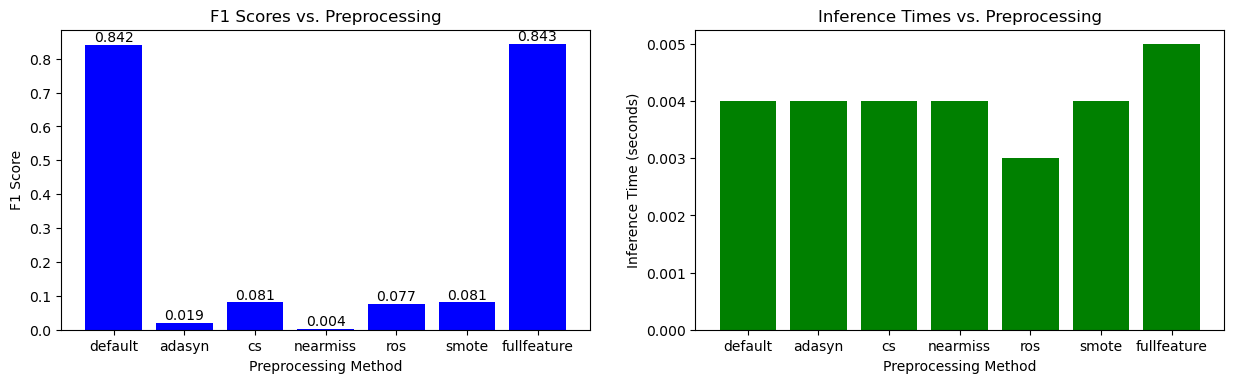

In [19]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote', 'fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []

# Decision tree
for pre in preprocess:
    model = train_model_decision_tree(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()       
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1_score:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

### Random Fortest

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: default
Optimize: on
Training Time: 1.0388774871826172 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: adasyn
Optimize: on
Training Time: 2.8708930015563965 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: cs
Optimize: on
Training Time: 2.9273433685302734 seconds

Model: random_forest
Preprocess: nearmiss
Optimize: on
Training Time: 0.018564701080322266 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: ros
Optimize: on
Training Time: 2.58127498626709 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: smote
Optimize: on
Training Time: 3.0126357078552246 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: fullfeature
Optimize: on
Training Time: 1.3326199054718018 seconds



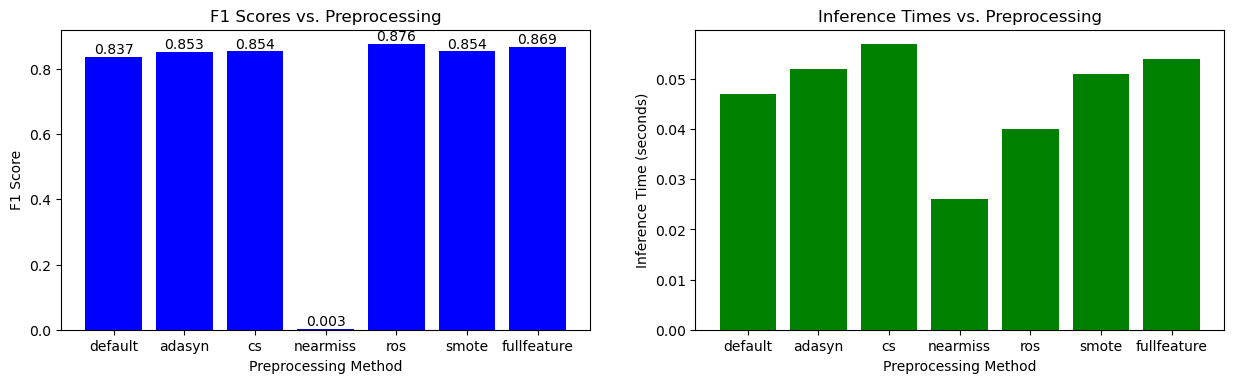

In [20]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote', 'fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []

# Random Forest
for pre in preprocess:
    model = train_model_random_forest(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

### SVM

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: default
Optimize: on
Training Time: 3.363675355911255 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: adasyn
Optimize: on
Training Time: 211.28386116027832 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: cs
Optimize: on
Training Time: 92.43375635147095 seconds

Model: svm
Preprocess: nearmiss
Optimize: on
Training Time: 0.005995512008666992 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: ros
Optimize: on
Training Time: 151.78525376319885 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: smote
Optimize: on
Training Time: 92.22554516792297 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: svm
Preprocess: fullfeature
Optimize: on
Training Time: 2.9032480716705322 seconds



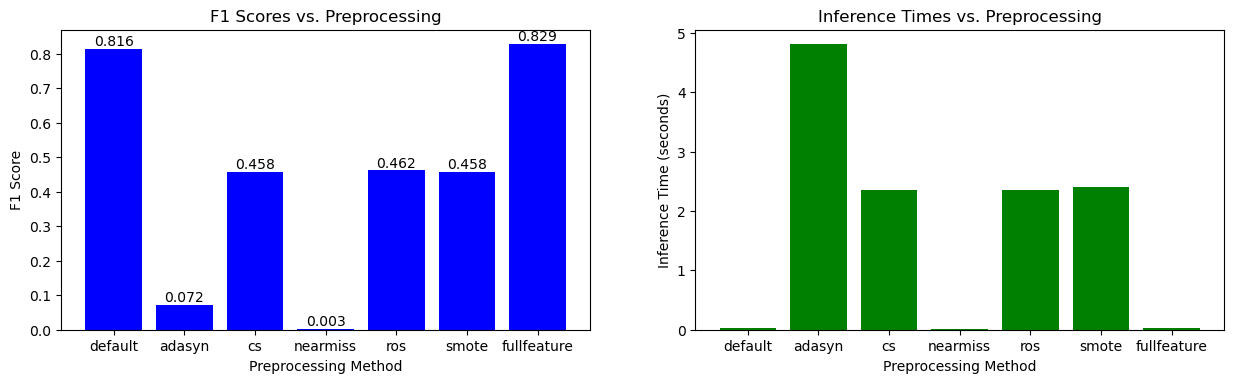

In [21]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote', 'fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []
for pre in preprocess:
    model = train_model_svm(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

### KNN

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: default
Optimize: on
Training Time: 0.8705775737762451 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: adasyn
Optimize: on
Training Time: 1.7980239391326904 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: cs
Optimize: on
Training Time: 1.8564321994781494 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: nearmiss
Optimize: on
Training Time: 0.0029883384704589844 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: ros
Optimize: on
Training Time: 2.1089088916778564 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: smote
Optimize: on
Training Time: 1.861034870147705 seconds



c:\Users\SY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: knn
Preprocess: fullfeature
Optimize: on
Training Time: 0.02115797996520996 seconds



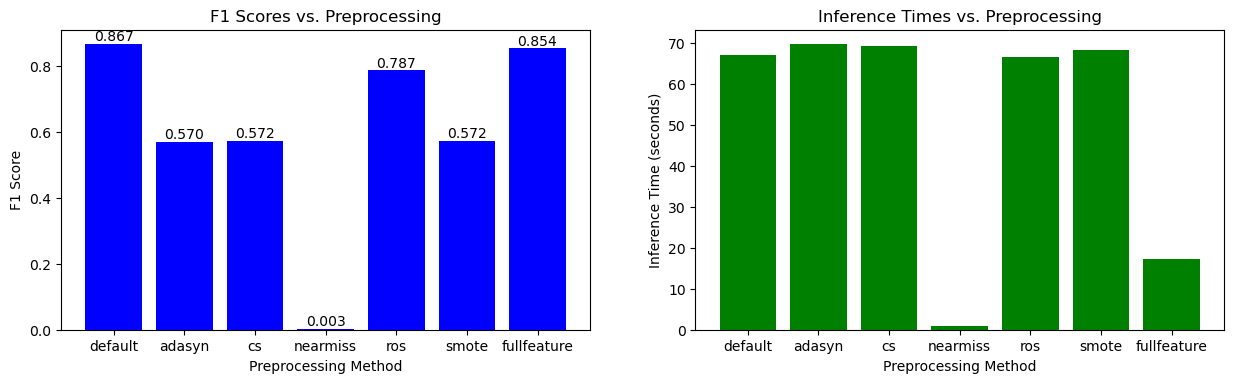

In [23]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

preprocess = ['default', 'adasyn', 'cs', 'nearmiss', 'ros', 'smote', 'fullfeature']
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

f1_scores = []
inference_times = []
# Random Forest
f1_scores.clear()
inference_times.clear()
for pre in preprocess:
    model = train_model_knn(preprocess=pre, cross_val='off', opt='on')
    if pre=='fullfeature':
        x_test = pd.read_csv('x_test_fullfeature.csv')
        y_test = pd.read_csv('y_test_fullfeature.csv')
    start_time = time.time()
    y_pred = model.predict(x_test)
    end_time = time.time()
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    inference_times.append(end_time - start_time)

plt.figure(figsize=(15, 5))

# Plotting F1 Scores
plt.subplot(1, 2, 1)
bars = plt.bar(preprocess, f1_scores, color='blue')
plt.title('F1 Scores vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('F1 Score')

# Adding values on top of the bars
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1:.3f}', ha='center', color='black')

# Plotting Inference Times
plt.subplot(1, 2, 2)
bars = plt.bar(preprocess, inference_times, color='green')
plt.title('Inference Times vs. Preprocessing')
plt.xlabel('Preprocessing Method')
plt.ylabel('Inference Time (seconds)')


# Adjusting layout manually
plt.subplots_adjust(bottom=0.2, top=0.8)

plt.show()

In [ ]:
model_dt = train_model_decision_tree(opt='off')
model_dt_opt = train_model_decision_tree(opt='on')

model_rf = train_model_random_forest(opt='off')
model_rf_opt = train_model_random_forest(opt='on')

model_svm = train_model_svm(opt='off')
model_svm_opt = train_model_svm(opt='on')

model_knn = train_model_knn(opt='off')
model_knn_opt = train_model_knn(opt='on')

Model: decision_tree
Preprocess: default
Optimize: off
Training Time: 3.664985418319702 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: decision_tree
Preprocess: default
Optimize: on
Training Time: 3.543773651123047 seconds

Model: random_forest
Preprocess: default
Optimize: off
Training Time: 145.36254692077637 seconds



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: random_forest
Preprocess: default
Optimize: on
